In [1]:
import sys
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
sys.path.append(os.path.abspath('../source'))


In [2]:
base_url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/FARSData/GetFARSData"

# Encabezados
headers = {
    "Accept": "application/json", #TODO: cambiar a "Accept": "text/csv"
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Crear la carpeta para almacenar los archivos CSV
output_dir = "../data"
os.makedirs(output_dir, exist_ok=True)

# Automatizar la descarga por año
for year in range(2017, 2023):  # De 2015 a 2022
    # Construir la URL para cada año dinámicamente
    url = f"{base_url}?dataset=Accident&FromYear={year}&ToYear={year}&State=*&format=csv"
    print(f"Descargando datos para el año {year}...")

    try:
        # Realizar la solicitud al API
        response = requests.get(url, headers=headers, timeout=600, stream=True)  # Timeout de 10 minutos

        # Verificar si la solicitud fue exitosa
        if response.status_code == 200:
            # Guardar los datos en el archivo CSV
            output_file = os.path.join(output_dir, f"FARS_data_{year}.csv")
            with open(output_file, "wb") as file:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:
                        file.write(chunk)
            print(f"✅ Datos del año {year} guardados exitosamente en {output_file}")
        else:
            print(f"❌ Error al obtener los datos para el año {year}: Código HTTP {response.status_code}")
            print(response.text)

    except requests.exceptions.Timeout:
        print(f"⏱️ La solicitud para el año {year} excedió el tiempo límite.")
    except requests.exceptions.RequestException as e:
        print(f"❌ Error en la solicitud para el año {year}: {e}")

Descargando datos para el año 2017...
✅ Datos del año 2017 guardados exitosamente en ../data\FARS_data_2017.csv
Descargando datos para el año 2018...
✅ Datos del año 2018 guardados exitosamente en ../data\FARS_data_2018.csv
Descargando datos para el año 2019...
✅ Datos del año 2019 guardados exitosamente en ../data\FARS_data_2019.csv
Descargando datos para el año 2020...
✅ Datos del año 2020 guardados exitosamente en ../data\FARS_data_2020.csv
Descargando datos para el año 2021...
✅ Datos del año 2021 guardados exitosamente en ../data\FARS_data_2021.csv
Descargando datos para el año 2022...
✅ Datos del año 2022 guardados exitosamente en ../data\FARS_data_2022.csv


In [42]:
data_2017 = pd.read_csv('../data/FARS_data_2017.csv')
data_2018 = pd.read_csv('../data/FARS_data_2018.csv')
data_2019 = pd.read_csv('../data/FARS_data_2019.csv')
data_2020 = pd.read_csv('../data/FARS_data_2020.csv')
data_2021 = pd.read_csv('../data/FARS_data_2021.csv')
data_2022 = pd.read_csv('../data/FARS_data_2022.csv')

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_18168\2599200083.py:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2017 = pd.read_csv('../data/FARS_data_2017.csv')


In [43]:
df = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022], ignore_index=True)
df.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,hosp_mn,hosp_mnname,cf1,cf1name,cf2,cf2name,cf3,cf3name,fatals,drunk_dr
0,2017,1,10001,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
1,2017,1,10002,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
2,2017,1,10003,Alabama,3,3,0,0,0,3,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
3,2017,1,10004,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),20.0,Police Pursuit Involved,0.0,NaN,0.0,NaN,1,0.0
4,2017,1,10005,Alabama,1,1,0,0,0,2,...,11,11,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0


In [44]:
df.shape

(218576, 93)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218576 entries, 0 to 218575
Data columns (total 93 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   caseyear      218576 non-null  int64  
 1   state         218576 non-null  int64  
 2   st_case       218576 non-null  int64  
 3   statename     218576 non-null  object 
 4   ve_total      218576 non-null  int64  
 5   ve_forms      218576 non-null  int64  
 6   pvh_invl      218576 non-null  int64  
 7   peds          218576 non-null  int64  
 8   pernotmvit    218576 non-null  int64  
 9   permvit       218576 non-null  int64  
 10  persons       218576 non-null  int64  
 11  county        218576 non-null  int64  
 12  countyname    218576 non-null  object 
 13  city          218576 non-null  int64  
 14  cityname      218576 non-null  object 
 15  day           218576 non-null  int64  
 16  month         218576 non-null  int64  
 17  monthname     218576 non-null  object 
 18  year

In [46]:
df.columns

Index(['caseyear', 'state', 'st_case', 'statename', 've_total', 've_forms',
       'pvh_invl', 'peds', 'pernotmvit', 'permvit', 'persons', 'county',
       'countyname', 'city', 'cityname', 'day', 'month', 'monthname', 'year',
       'day_week', 'day_weekname', 'hour', 'hourname', 'minute', 'minutename',
       'nhs', 'nhsname', 'rur_urb', 'rur_urbname', 'func_sys', 'func_sysname',
       'rd_owner', 'rd_ownername', 'route', 'routename', 'tway_id', 'tway_id2',
       'milept', 'mileptname', 'latitude', 'latitudename', 'longitud',
       'longitudname', 'sp_jur', 'sp_jurname', 'harm_ev', 'harm_evname',
       'man_coll', 'man_collname', 'reljct1', 'reljct1name', 'reljct2',
       'reljct2name', 'typ_int', 'typ_intname', 'wrk_zone', 'wrk_zonename',
       'road_fnc', 'road_fncname', 'rel_road', 'rel_roadname', 'lgt_cond',
       'lgt_condname', 'weather1', 'weather1name', 'weather2', 'weather2name',
       'weather', 'weathername', 'sch_bus', 'sch_busname', 'rail', 'railname',
       'no

### PERSONS

Data Element ID Data Element Name SAS Name 
P5/NM5 Age  AGE 
P6/NM6 Sex  SEX 
P7/NM7 Person Type  PER_TYP 
P8/NM8 Injury Severity  INJ_SEV 
P9 Seating Position  SEAT_POS 
P10A Restraint System Use  REST_USE
P13 Ejection  EJECTION
P17C/NM19C Alcohol Test Result  ALC_RES
P19A/NM21A Drug Test Status  DSTATUS
P21/NM23 Died at Scene/En Route  DOA 


### VEHICLES

V4 Number of Occupants  NUMOCCS
V6 Hit-and-Run  HIT_RUN 
V16 NCSA Body Type  BODY_TYP
D5 Driver’s License State  L_STATE 
D7A Non-CDL License Type  L_TYPE 
D11 Compliance with License Restrictions  L_RESTRI
D14 Previous Recorded Crashes  PREV_ACC 
D17 Previous Speeding Convictions  PREV_SPD 
D18 Previous Other Moving Violation Convictions  PREV_OTH 
D15C Previous Recorded Other Suspensions, 
Revocations, or Withdrawals  
PREV_SUS3 

In [47]:
columns = [
    've_total', 'pernotmvit', 'permvit', 'fatals', 'peds',
    'hosp_hr', 'hosp_mn', 'arr_hour', 'arr_min',
    'year', 'monthname', 'day_weekname', 'hourname',
    'state', 'statename', 'rur_urbname', 'func_sysname', 'rel_roadname',
    'weathername', 'lgt_condname',
    'drunk_dr',
    'man_collname', 'harm_evname'
]

df = df[columns]


In [48]:
df

,ve_total,pernotmvit,permvit,fatals,peds,hosp_hr,hosp_mn,arr_hour,arr_min,year,...,state,statename,rur_urbname,func_sysname,rel_roadname,weathername,lgt_condname,drunk_dr,man_collname,harm_evname
0,1,0,1,1,0,88,88,99,99,2017,...,1,Alabama,Urban,Interstate,On Median,Clear,Dark - Not Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Fence
1,1,0,1,1,0,88,88,15,9,2017,...,1,Alabama,Urban,Interstate,On Median,Clear,Daylight,0.0,Not a Collision with Motor Vehicle In-Transport,Rollover/Overturn
2,3,0,3,1,0,88,88,99,99,2017,...,1,Alabama,Urban,Interstate,On Roadway,Clear,Dark - Not Lighted,0.0,Front-to-Rear,Motor Vehicle In-Transport
3,1,0,1,1,0,88,88,16,58,2017,...,1,Alabama,Urban,Minor Arterial,On Roadside,Rain,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Utility Pole/Light Support
4,1,0,2,1,0,21,11,20,31,2017,...,1,Alabama,Rural,Interstate,On Median,Rain,Dark - Not Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Embankment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218571,2,0,2,1,0,12,4,11,35,2022,...,56,Wyoming,Urban,Interstate,On Roadway,Clear,Daylight,NaN,Front-to-Front,Motor Vehicle In-Transport
218572,1,0,1,1,0,88,88,99,98,2022,...,56,Wyoming,Rural,Not Reported,On Roadway,Snow,Dawn,NaN,The First Harmful Event was Not a Collision wi...,Rollover/Overturn
218573,1,0,1,1,0,15,27,15,7,2022,...,56,Wyoming,Urban,Major Collector,On Roadside,Snow,Daylight,NaN,The First Harmful Event was Not a Collision wi...,Curb
218574,1,0,1,1,0,88,88,7,40,2022,...,56,Wyoming,Rural,Not Reported,On Roadside,Snow,Dark - Not Lighted,NaN,The First Harmful Event was Not a Collision wi...,Boulder


In [49]:
df.dtypes

ve_total          int64
pernotmvit        int64
permvit           int64
fatals            int64
peds              int64
hosp_hr           int64
hosp_mn           int64
arr_hour          int64
arr_min           int64
year              int64
monthname        object
day_weekname     object
hourname         object
state             int64
statename        object
rur_urbname      object
func_sysname     object
rel_roadname     object
weathername      object
lgt_condname     object
drunk_dr        float64
man_collname     object
harm_evname      object
dtype: object

In [50]:
df.isnull().sum()

ve_total            0
pernotmvit          0
permvit             0
fatals              0
peds                0
hosp_hr             0
hosp_mn             0
arr_hour            0
arr_min             0
year                0
monthname           0
day_weekname        0
hourname            0
state               0
statename           0
rur_urbname         0
func_sysname        0
rel_roadname        0
weathername         0
lgt_condname        0
drunk_dr        79595
man_collname        0
harm_evname         0
dtype: int64

In [51]:
df = df.dropna()

In [52]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index([], dtype='object')

In [53]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [54]:
df.duplicated().sum()

91

In [55]:
df.shape

(138981, 23)

In [56]:
df[df.duplicated()]

,ve_total,pernotmvit,permvit,fatals,peds,hosp_hr,hosp_mn,arr_hour,arr_min,year,...,state,statename,rur_urbname,func_sysname,rel_roadname,weathername,lgt_condname,drunk_dr,man_collname,harm_evname
4339,1,1,1,1,1,88,88,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4597,1,1,1,1,1,99,99,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4725,1,1,1,1,1,88,88,99,99,2017,...,6,California,Urban,Minor Arterial,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4760,1,1,1,1,1,99,99,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4984,1,1,1,1,1,99,99,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126955,2,0,3,1,0,99,99,99,99,2020,...,37,North Carolina,Rural,Local,On Roadway,Clear,Daylight,0.0,Front-to-Front,Motor Vehicle In-Transport
133153,1,1,1,1,1,88,88,99,98,2020,...,48,Texas,Urban,Minor Arterial,On Roadway,Cloudy,Dark - Not Lighted,0.0,The First Harmful Event was Not a Collision wi...,Pedestrian
134417,2,0,2,1,0,88,88,99,98,2020,...,48,Texas,Urban,Major Collector,On Roadway,Clear,Dark - Not Lighted,0.0,Front-to-Front,Motor Vehicle In-Transport
134802,1,0,1,1,0,88,88,99,98,2020,...,48,Texas,Urban,Principal Arterial - Other,On Roadside,Clear,Dawn,0.0,The First Harmful Event was Not a Collision wi...,Immersion or Partial Immersion


In [57]:
df = df.drop_duplicates()

In [58]:
df.shape

(138890, 23)

In [59]:
df.describe(include="object")

,monthname,day_weekname,hourname,statename,rur_urbname,func_sysname,rel_roadname,weathername,lgt_condname,man_collname,harm_evname
count,138890,138890,138890,138890,138890,138890,138890,138890,138890,138890,138890
unique,12,7,25,52,5,10,14,14,10,13,58
top,July,Saturday,6:00pm-6:59pm,California,Urban,Principal Arterial - Other,On Roadway,Clear,Daylight,The First Harmful Event was Not a Collision wi...,Motor Vehicle In-Transport
freq,12894,23809,8145,14111,78391,41318,86044,95134,64869,42730,53988


In [60]:
df['hourname'].value_counts()    

hourname
6:00pm-6:59pm      8145
8:00pm-8:59pm      8123
9:00pm-9:59pm      8053
7:00pm-7:59pm      7860
5:00pm-5:59pm      7593
4:00pm-4:59pm      7056
3:00pm-3:59pm      7033
10:00pm-10:59pm    6954
2:00pm-2:59pm      6419
11:00pm-11:59pm    6292
1:00pm-1:59pm      5865
12:00pm-12:59pm    5448
0:00am-0:59am      5372
6:00am-6:59am      5213
1:00am-1:59am      4950
11:00am-11:59am    4881
2:00am-2:59am      4864
7:00am-7:59am      4581
5:00am-5:59am      4383
10:00am-10:59am    4230
8:00am-8:59am      3717
9:00am-9:59am      3714
3:00am-3:59am      3671
4:00am-4:59am      3438
Unknown Hours      1035
Name: count, dtype: int64

In [61]:
df.drop(df[df['hourname'] == 'Unknown Hours'].index, inplace = True)

In [62]:
df.shape

(137855, 23)

In [63]:
df['rur_urbname'].value_counts()    

rur_urbname
Urban                                78065
Rural                                59366
Trafficway Not in State Inventory      270
Unknown                                134
Not Reported                            20
Name: count, dtype: int64

In [64]:
df.drop(df[df["rur_urbname"] == "Not Reported"].index, inplace=True)
df.drop(df[df["rur_urbname"] == "Trafficway Not in State Inventory"].index, inplace=True)
df.drop(df[df["rur_urbname"] == "Unknown"].index, inplace=True)

In [65]:
df.columns

Index(['ve_total', 'pernotmvit', 'permvit', 'fatals', 'peds', 'hosp_hr',
       'hosp_mn', 'arr_hour', 'arr_min', 'year', 'monthname', 'day_weekname',
       'hourname', 'state', 'statename', 'rur_urbname', 'func_sysname',
       'rel_roadname', 'weathername', 'lgt_condname', 'drunk_dr',
       'man_collname', 'harm_evname'],
      dtype='object')

In [66]:
df.shape

(137431, 23)

In [67]:
df['weathername'].value_counts()  

weathername
Clear                       94275
Cloudy                      19146
Rain                        10507
Not Reported                 9428
Fog, Smog, Smoke             1538
Snow                         1314
Reported as Unknown           352
Severe Crosswinds             216
Sleet or Hail                 189
Other                         119
Freezing Rain or Drizzle      113
Blowing Snow                  105
Unknown                        93
Blowing Sand, Soil, Dirt       36
Name: count, dtype: int64

In [68]:
df.drop(df[df["weathername"] == "Not Reported"].index, inplace=True)
df.drop(df[df["weathername"] == "Other"].index, inplace=True)
df.drop(df[df["weathername"] == "Unknown"].index, inplace=True)
df.drop(df[df["weathername"] == "Reported as Unknown"].index, inplace=True)

In [69]:
df.shape

(127439, 23)

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ve_total,127439.0,1.582490,0.833851,1.0,1.0,1.0,2.0,59.0
pernotmvit,127439.0,0.244870,0.509245,0.0,0.0,0.0,0.0,23.0
permvit,127439.0,2.238891,1.744931,0.0,1.0,2.0,3.0,74.0
fatals,127439.0,1.086394,0.352253,1.0,1.0,1.0,1.0,20.0
peds,127439.0,0.233916,0.481235,0.0,0.0,0.0,0.0,23.0
hosp_hr,127439.0,73.455041,35.378251,0.0,23.0,88.0,99.0,99.0
hosp_mn,127439.0,77.447485,29.768445,0.0,59.0,88.0,99.0,99.0
arr_hour,127439.0,58.399854,42.970265,0.0,15.0,99.0,99.0,99.0
arr_min,127439.0,65.992906,36.545056,0.0,31.0,98.0,99.0,99.0
year,127439.0,2018.511115,1.128403,2017.0,2017.0,2019.0,2020.0,2020.0


In [71]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_log = []

for col in numerical_cols:
    print(f"\n--- Analyzing Outliers for '{col}' ---")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    num_outliers = len(outliers)

    print(f"Number of Outliers: {num_outliers}")
    print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")

    outlier_log.append({
        'Variable': col,
        'Outliers': num_outliers,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit,
        'Porcentaje de Outliers': round(num_outliers / len(df) * 100, 2)
    })

print("\nResumen de Outliers:")
print(outlier_log)



--- Analyzing Outliers for 've_total' ---
Number of Outliers: 3055
Lower Limit: -0.50, Upper Limit: 3.50

--- Analyzing Outliers for 'pernotmvit' ---
Number of Outliers: 28444
Lower Limit: 0.00, Upper Limit: 0.00

--- Analyzing Outliers for 'permvit' ---
Number of Outliers: 3179
Lower Limit: -2.00, Upper Limit: 6.00

--- Analyzing Outliers for 'fatals' ---
Number of Outliers: 9011
Lower Limit: 1.00, Upper Limit: 1.00

--- Analyzing Outliers for 'peds' ---
Number of Outliers: 27755
Lower Limit: 0.00, Upper Limit: 0.00

--- Analyzing Outliers for 'hosp_hr' ---
Number of Outliers: 0
Lower Limit: -91.00, Upper Limit: 213.00

--- Analyzing Outliers for 'hosp_mn' ---
Number of Outliers: 0
Lower Limit: -1.00, Upper Limit: 159.00

--- Analyzing Outliers for 'arr_hour' ---
Number of Outliers: 0
Lower Limit: -111.00, Upper Limit: 225.00

--- Analyzing Outliers for 'arr_min' ---
Number of Outliers: 0
Lower Limit: -71.00, Upper Limit: 201.00

--- Analyzing Outliers for 'year' ---
Number of Outlie

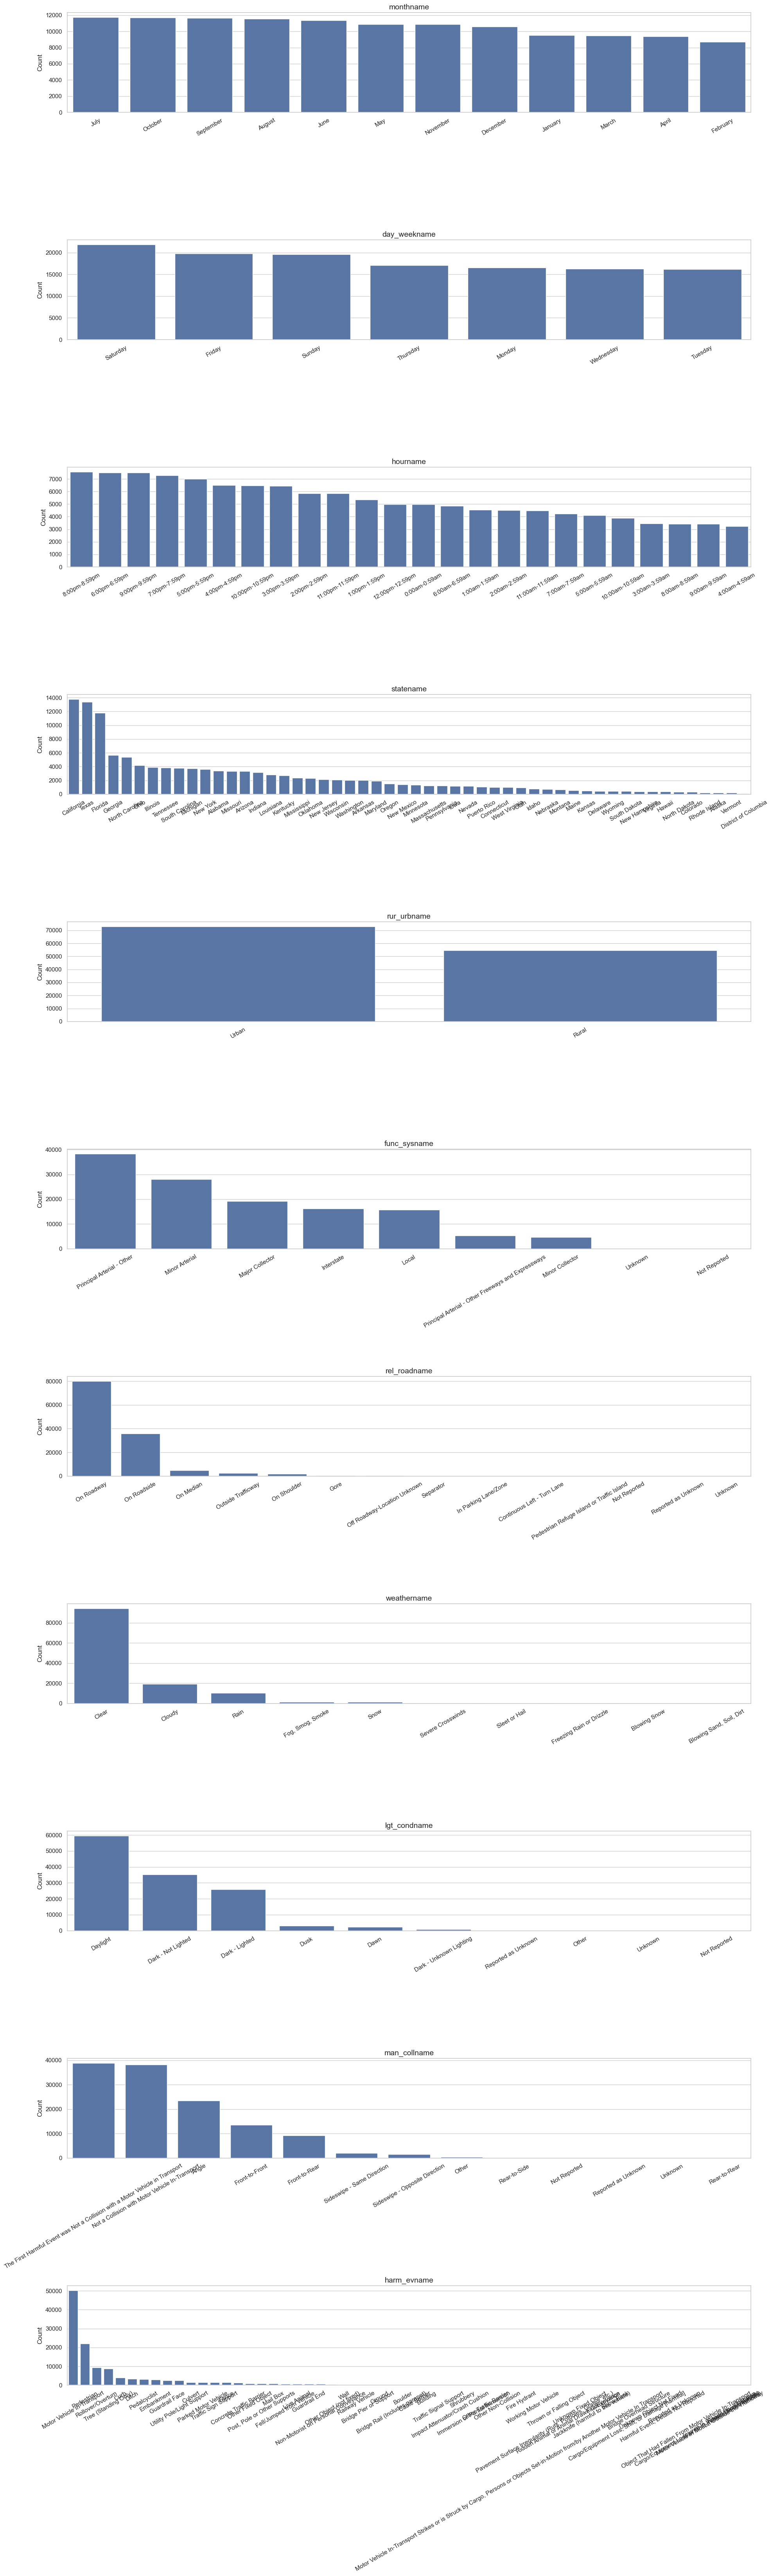

In [72]:
col_cat = ["monthname", "day_weekname", "hourname", "statename", "rur_urbname",
            "func_sysname", "rel_roadname", "weathername", "lgt_condname", 
            "man_collname", "harm_evname"]


dtype: object
n_rows = len(col_cat)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(20, 6 * n_rows))
fig.subplots_adjust(hspace=0.6)

if n_rows == 1:
    axes = [axes]

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")  
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


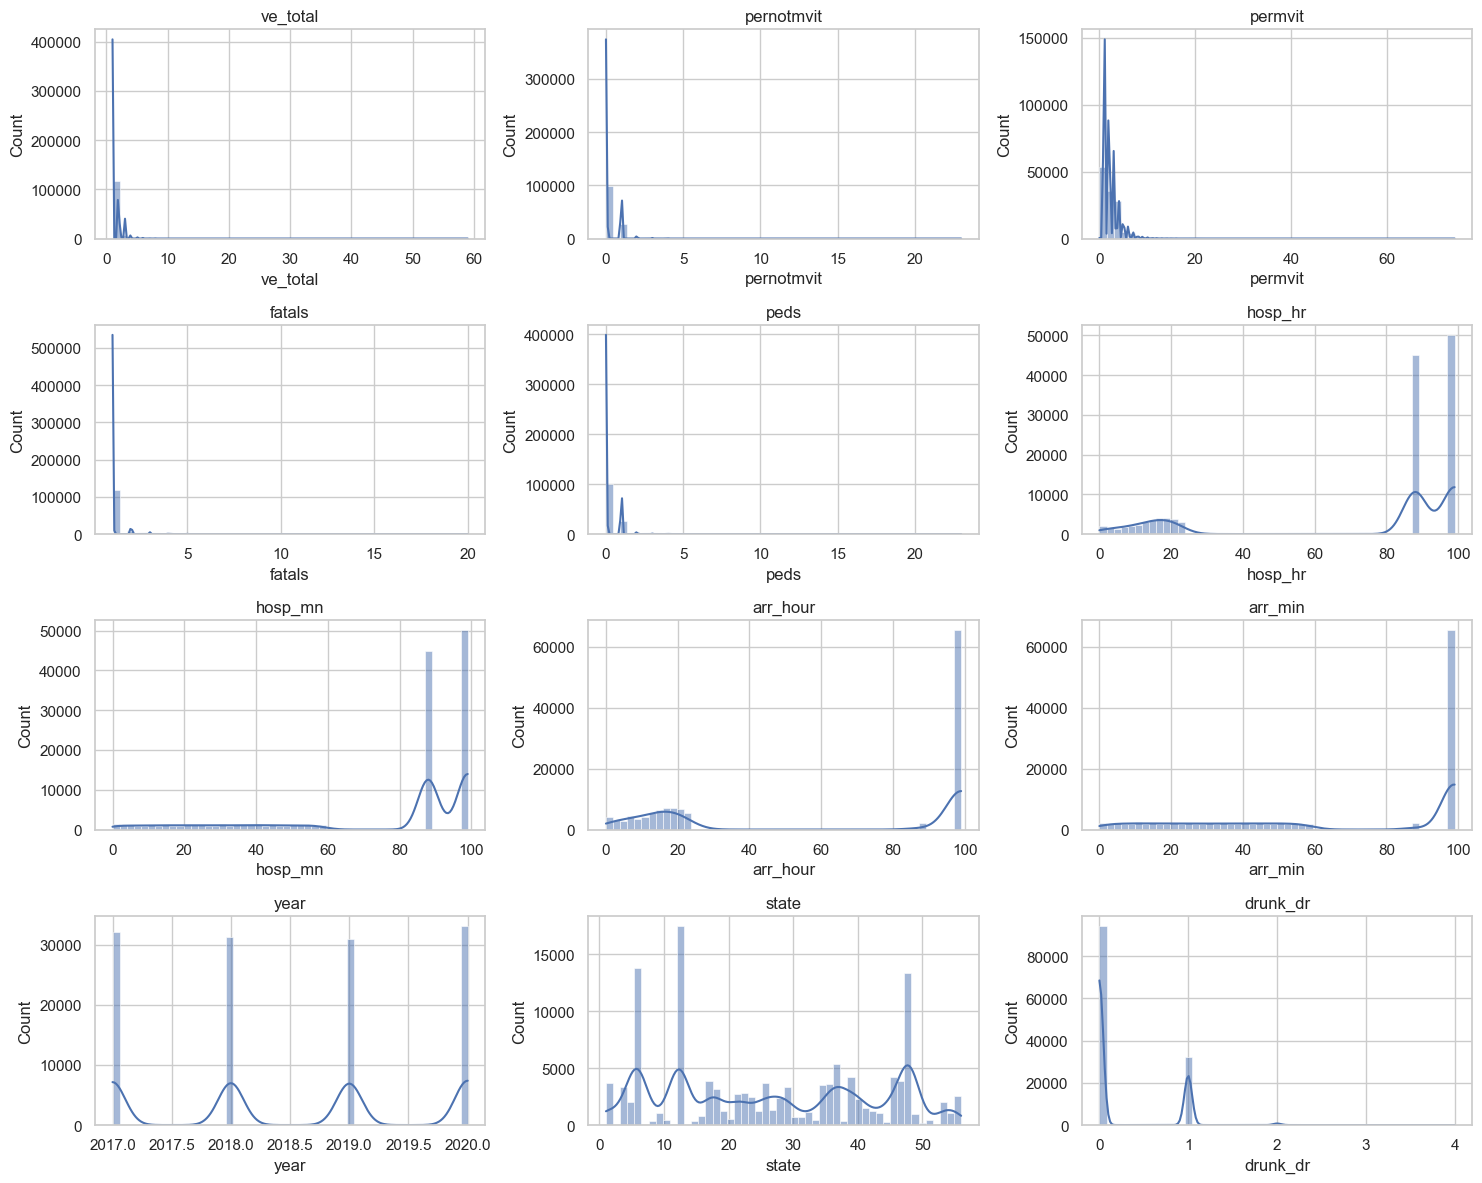

In [73]:
col_num = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = math.ceil(len(col_num) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(col_num):
    nbins = 10 if col == 'age' else 50
    sns.histplot(x=col, data=df, ax=axes[i], bins=nbins, kde=True)
    axes[i].set_title(f"{col}", fontsize=12)

# Si sobran ejes (porque no llenamos el grid), los escondemos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

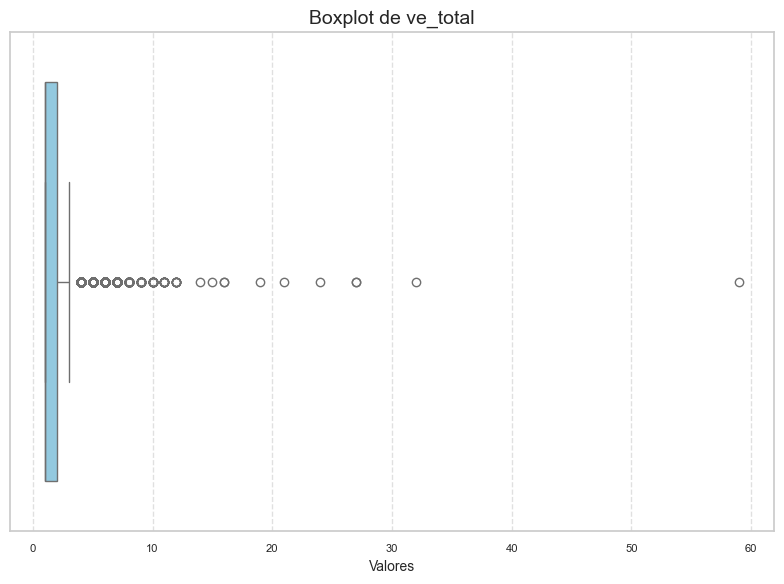

Outliers en ve_total:
        ve_total
22             4
143            4
206            4
228            4
338            4
...          ...
138807         4
138824         4
138869         4
138875         5
138955         6

[3055 rows x 1 columns]
Número de outliers: 3055
------------------------------


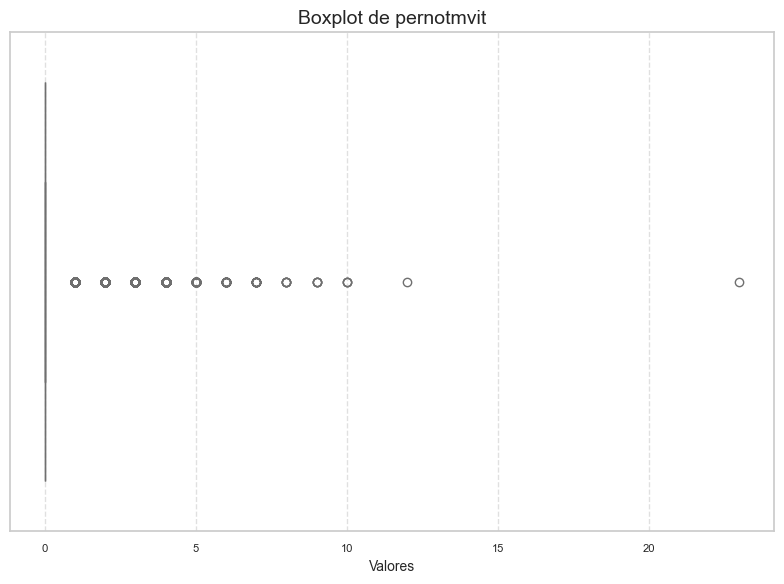

Outliers en pernotmvit:
        pernotmvit
9                1
26               1
39               1
45               1
52               1
...            ...
138938           1
138951           1
138964           1
138970           1
138979           1

[28444 rows x 1 columns]
Número de outliers: 28444
------------------------------


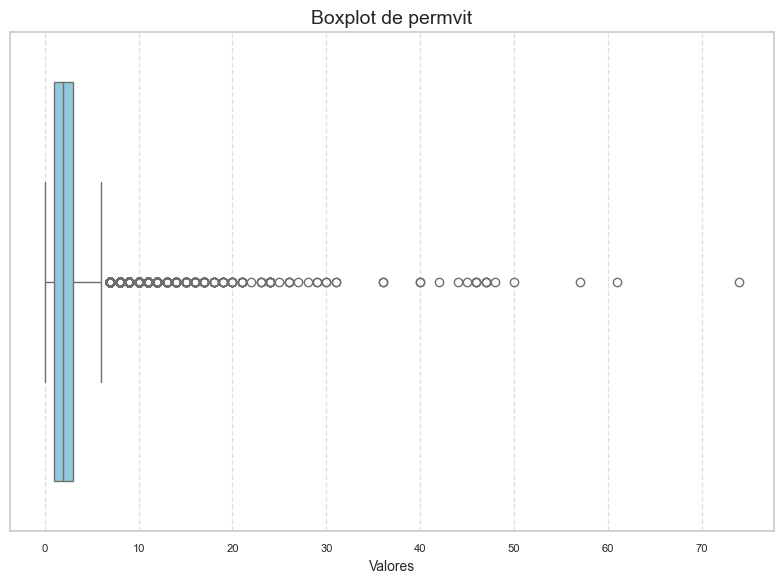

Outliers en permvit:
        permvit
88            7
89            7
178           7
186           7
206           8
...         ...
138888        7
138947       11
138965        8
138977        8
138978        9

[3179 rows x 1 columns]
Número de outliers: 3179
------------------------------


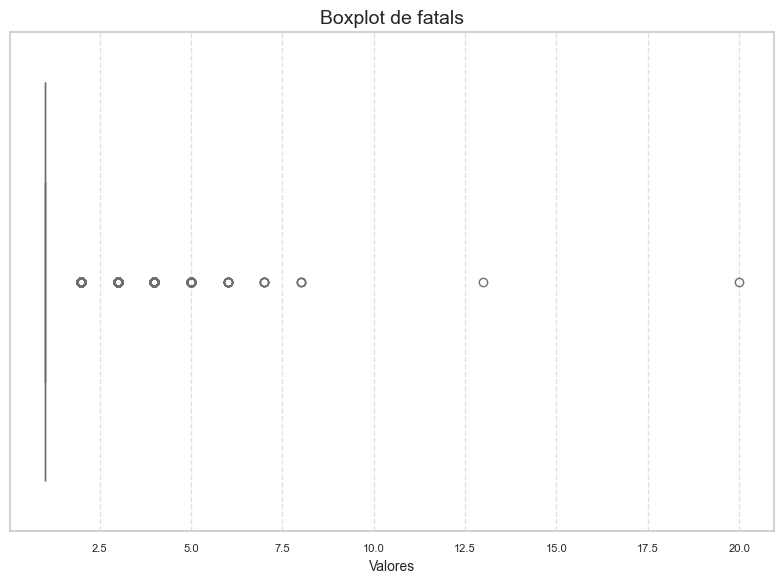

Outliers en fatals:
        fatals
10           2
12           2
34           2
40           2
41           2
...        ...
138924       2
138953       2
138956       2
138965       2
138977       2

[9011 rows x 1 columns]
Número de outliers: 9011
------------------------------


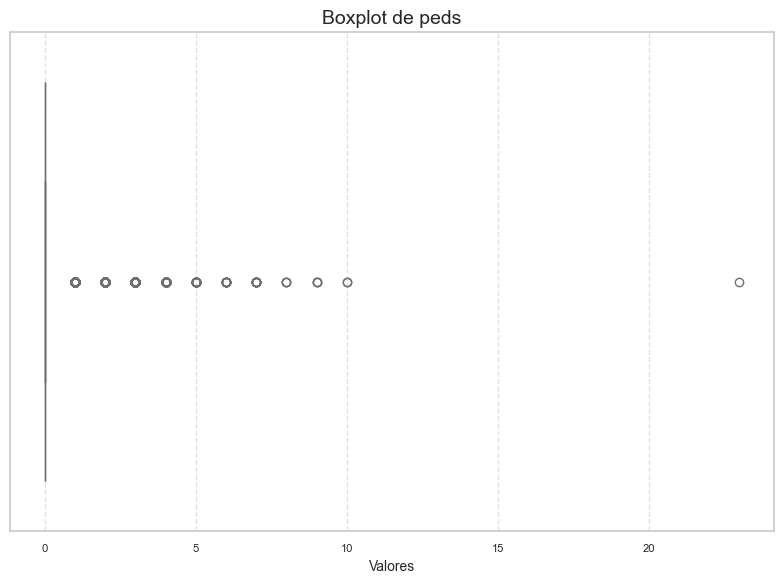

Outliers en peds:
        peds
9          1
26         1
39         1
45         1
52         1
...      ...
138938     1
138951     1
138964     1
138970     1
138979     1

[27755 rows x 1 columns]
Número de outliers: 27755
------------------------------


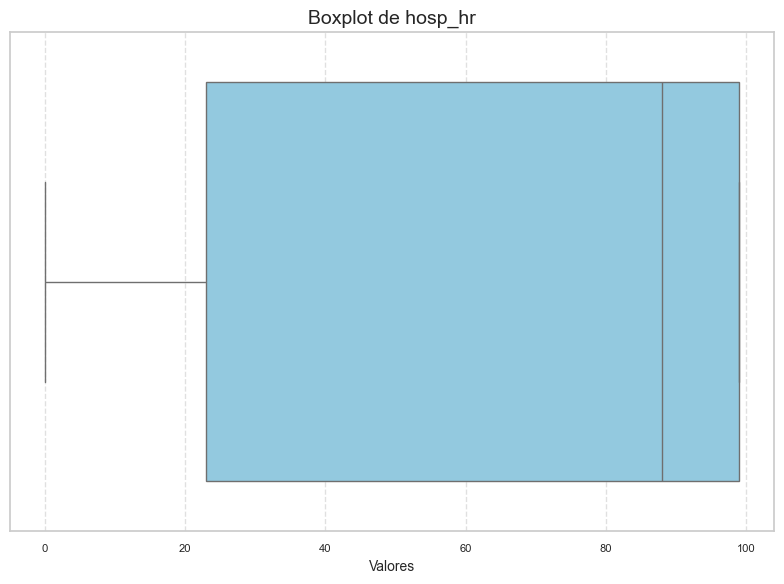

No se encontraron outliers en hosp_hr
------------------------------


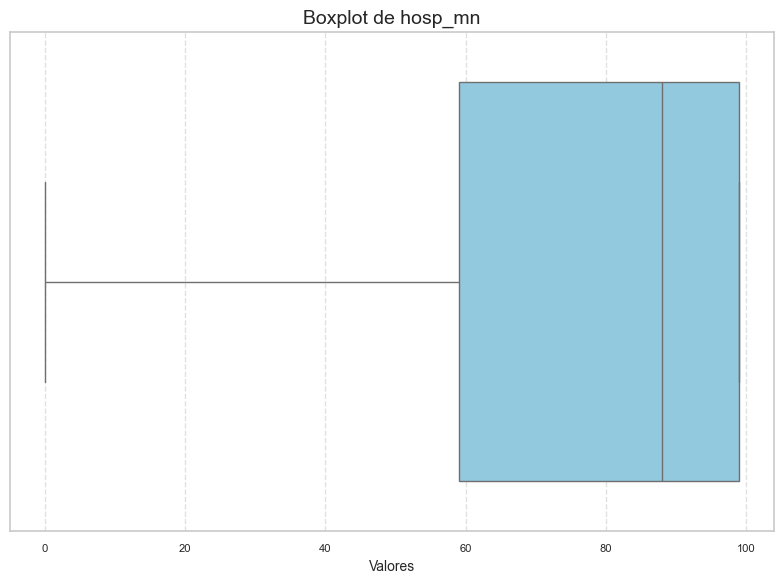

No se encontraron outliers en hosp_mn
------------------------------


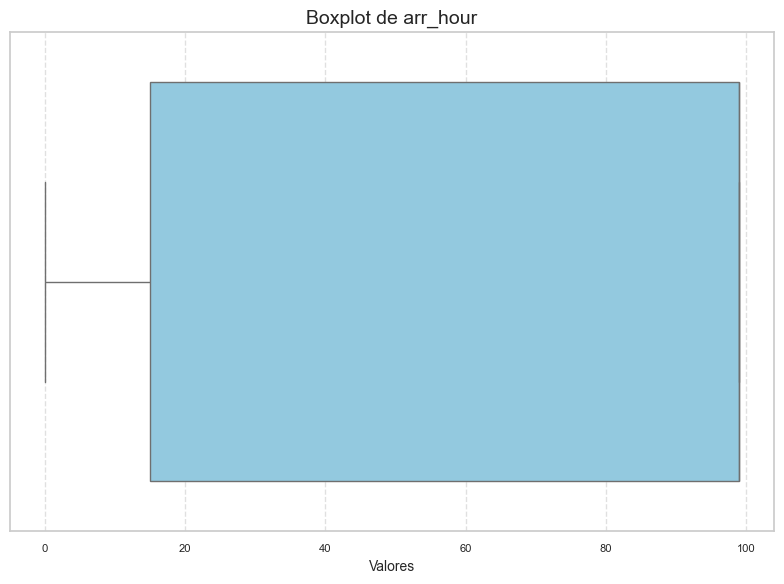

No se encontraron outliers en arr_hour
------------------------------


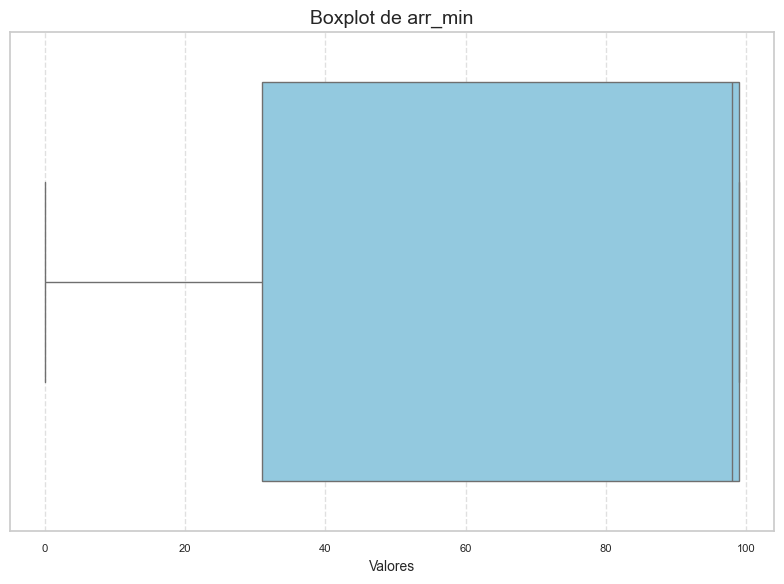

No se encontraron outliers en arr_min
------------------------------


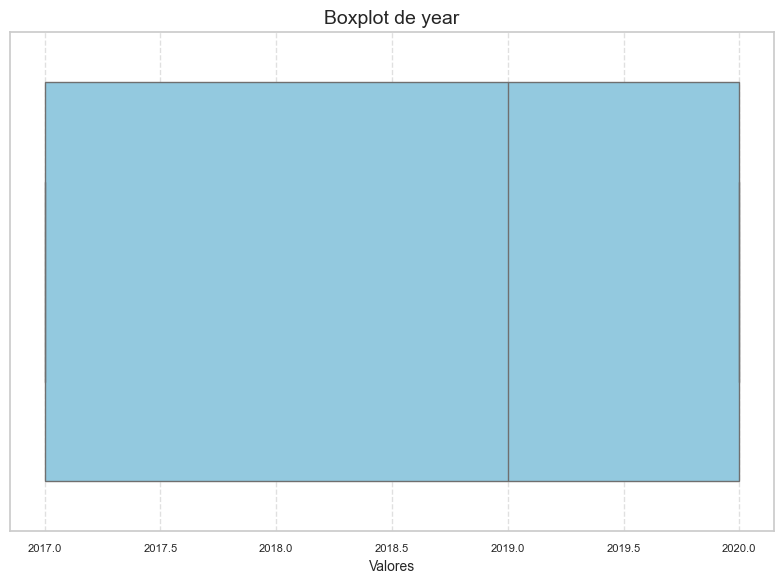

No se encontraron outliers en year
------------------------------


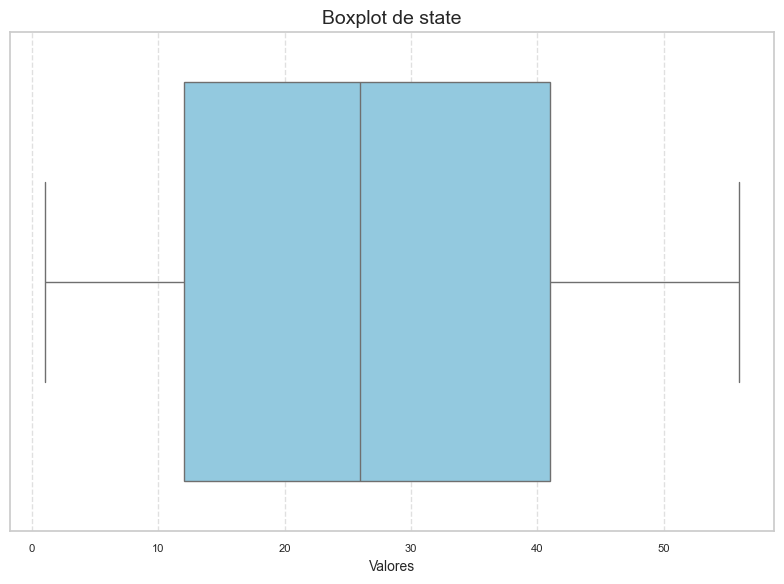

No se encontraron outliers en state
------------------------------


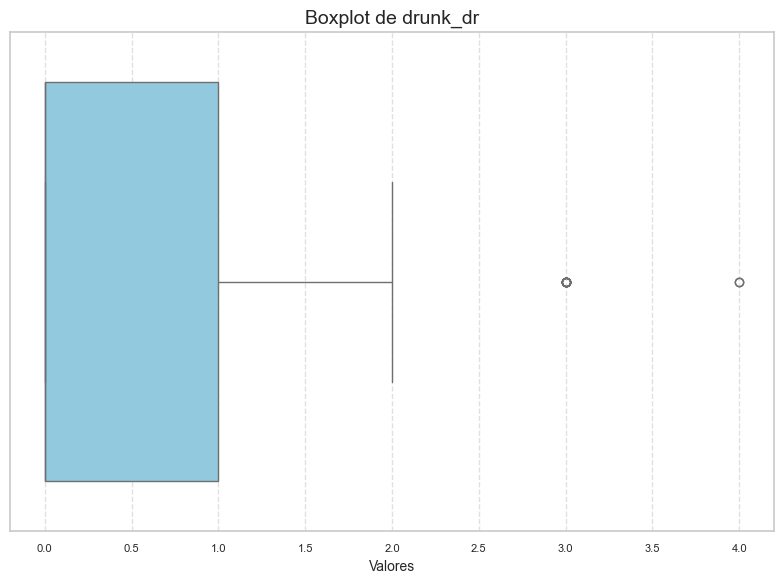

Outliers en drunk_dr:
        drunk_dr
2188         3.0
23821        3.0
24132        3.0
34788        3.0
40095        3.0
43313        4.0
88342        4.0
113869       3.0
119976       3.0
120492       3.0
123257       3.0
123944       3.0
126585       3.0
Número de outliers: 13
------------------------------


In [74]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers en {col}:")
        print(outliers[[col]])
        print(f"Número de outliers: {len(outliers)}")
        print("-" * 30)
    else:
        print(f"No se encontraron outliers en {col}")
        print("-" * 30)

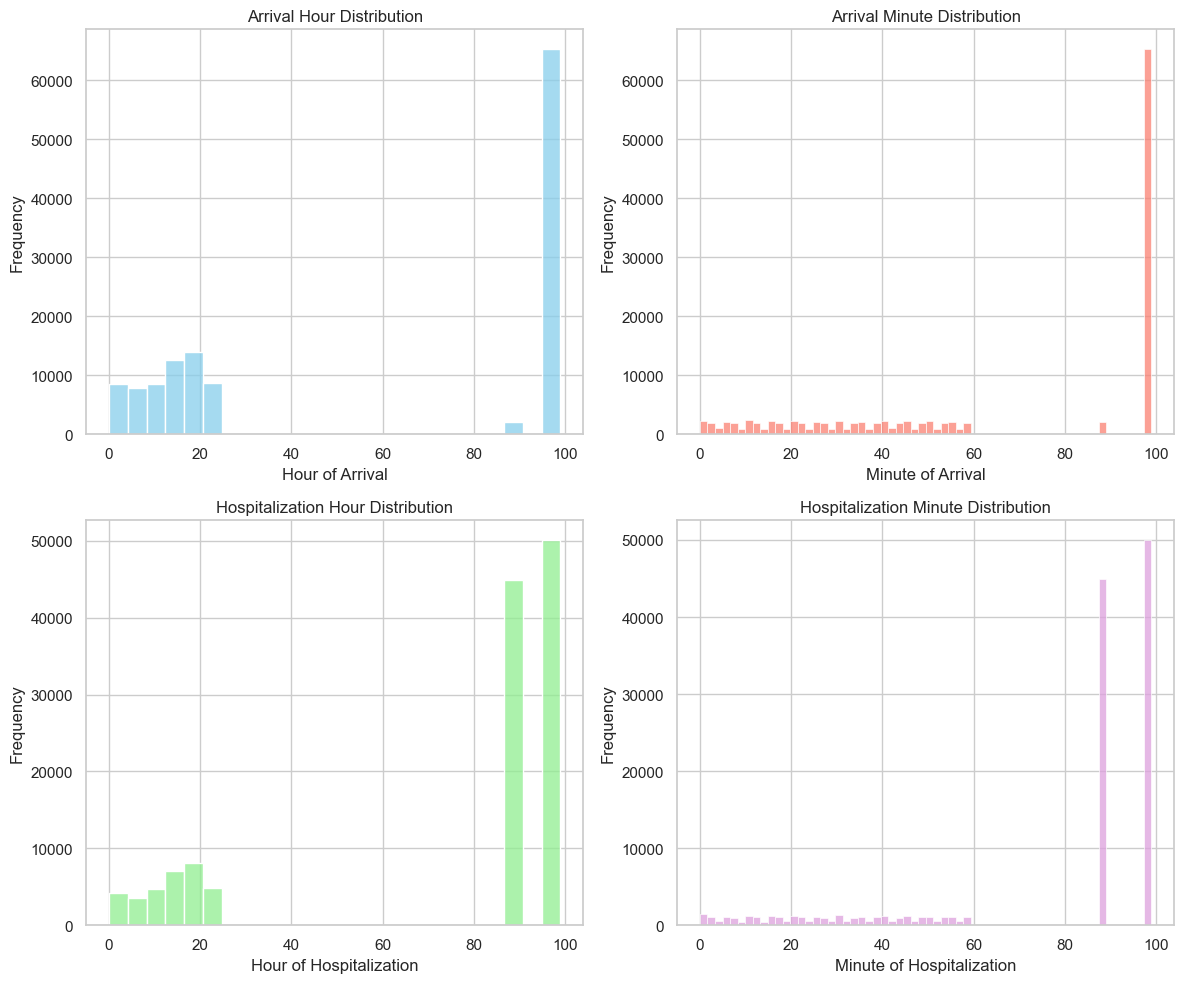

In [75]:
sns.set(style="whitegrid")

# Tamaño general de los gráficos
plt.figure(figsize=(12, 10))

# Histograma 1: arr_hour
plt.subplot(2, 2, 1)
sns.histplot(df['arr_hour'], bins=24, kde=False, color="skyblue")
plt.title('Arrival Hour Distribution')
plt.xlabel('Hour of Arrival')
plt.ylabel('Frequency')

# Histograma 2: arr_min
plt.subplot(2, 2, 2)
sns.histplot(df['arr_min'], bins=60, kde=False, color="salmon")
plt.title('Arrival Minute Distribution')
plt.xlabel('Minute of Arrival')
plt.ylabel('Frequency')

# Histograma 3: hosp_hr
plt.subplot(2, 2, 3)
sns.histplot(df['hosp_hr'], bins=24, kde=False, color="lightgreen")
plt.title('Hospitalization Hour Distribution')
plt.xlabel('Hour of Hospitalization')
plt.ylabel('Frequency')

# Histograma 4: hosp_mn
plt.subplot(2, 2, 4)
sns.histplot(df['hosp_mn'], bins=60, kde=False, color="plum")
plt.title('Hospitalization Minute Distribution')
plt.xlabel('Minute of Hospitalization')
plt.ylabel('Frequency')

# Ajuste final
plt.tight_layout()
plt.show()

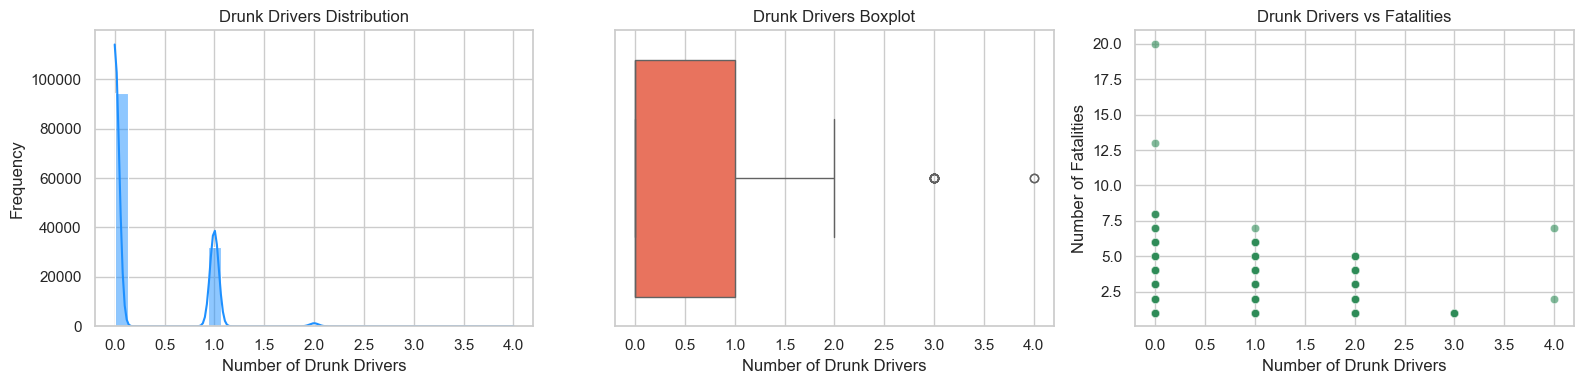

In [76]:
# Histograma de drunk_dr
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['drunk_dr'].dropna(), bins=30, kde=True, color="dodgerblue")
plt.title('Drunk Drivers Distribution')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Frequency')

# Boxplot de drunk_dr
plt.subplot(1, 3, 2)
sns.boxplot(x=df['drunk_dr'], color="tomato")
plt.title('Drunk Drivers Boxplot')
plt.xlabel('Number of Drunk Drivers')

# Scatter plot: drunk_dr vs fatals
plt.subplot(1, 3, 3)
sns.scatterplot(x='drunk_dr', y='fatals', data=df, alpha=0.6, color="seagreen")
plt.title('Drunk Drivers vs Fatalities')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Number of Fatalities')

plt.tight_layout()
plt.show()


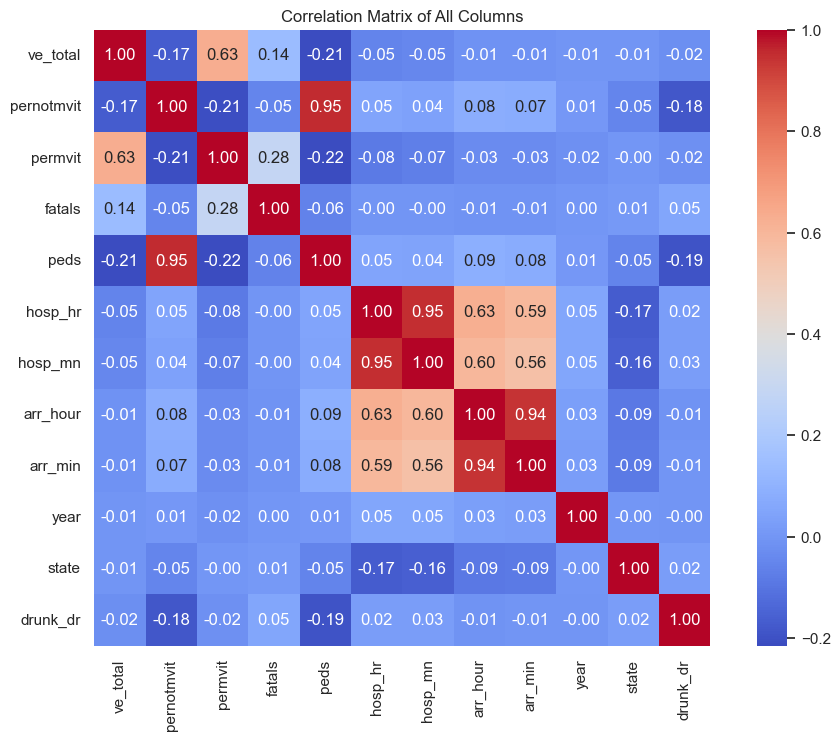

In [77]:
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Mat' \
'rix of All Columns')
plt.show()